In [ ]:
!pip install -U scikit-learn


     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

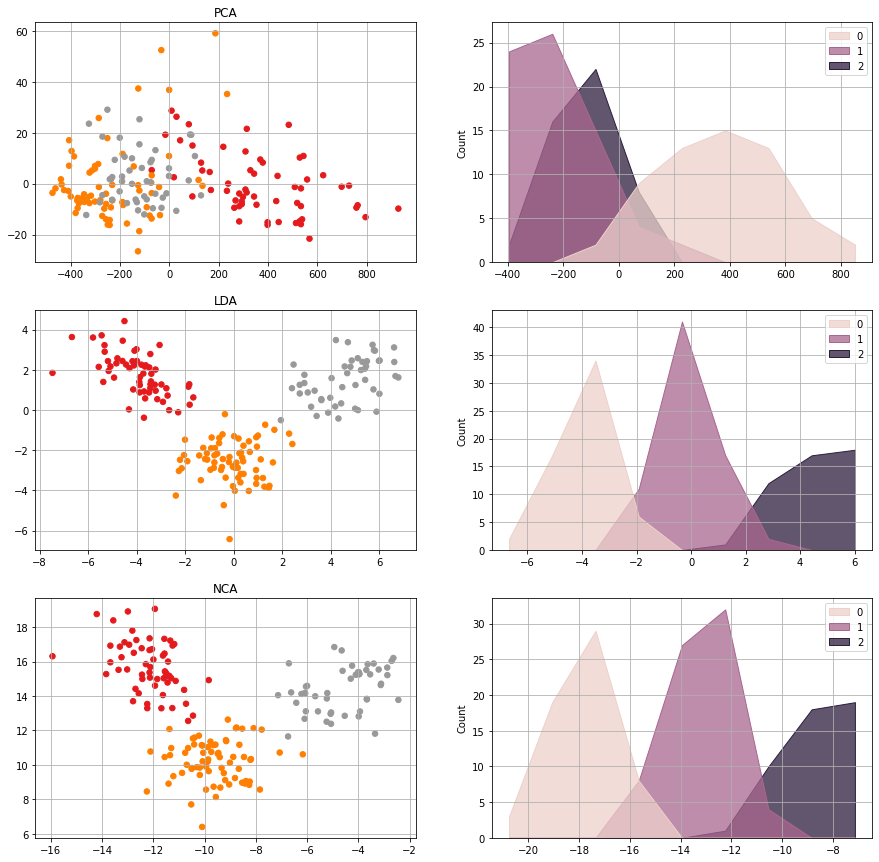

In [ ]:

X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)

lda1 = LinearDiscriminantAnalysis(n_components=1)
lda2 = LinearDiscriminantAnalysis(n_components=2)

nca1 = NeighborhoodComponentsAnalysis(n_components=1)
nca2 = NeighborhoodComponentsAnalysis(n_components=2)

dim_reduction_methods = [('PCA', pca1, pca2), ('LDA', lda1, lda2), ('NCA', nca1, nca2)]

figure, axa = plt.subplots(3,2, figsize=(15,15))
    
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    X_tr1 = model1.transform(X)
    X_tr2 = model2.transform(X)

    axa[i,0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y, s=30, cmap='Set1')
    sns.histplot(x=list(X_tr1.reshape(1,-1)[0]), hue=y, ax=axa[i,1], element="poly")
    axa[i,0].set_title(f"{name}")
    axa[i,0].grid()
    axa[i,1].grid()

plt.show()

  Автоматический отбор признаков

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [ ]:
sfs.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False, False])

In [ ]:
sfs.transform(X).shape

(178, 3)

In [ ]:
from sklearn.feature_selection import v
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)



In [ ]:
selector.support_

array([False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False])

In [ ]:
selector.ranking_


array([ 3,  8,  5,  6, 10,  4,  1,  1,  9,  7,  1,  2, 11])